# 03 Ranker data preprocessing

Combine candidates with articles and features data to be used as input to ranker.


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import logging
import pandas as pd

sys.path.append("..")

from src.utils.core_utils import setup_logging

In [3]:
# Initialize logging
file_log = "ranker_data_preprocessing.log"
root_logger = setup_logging(level=logging.DEBUG, log_file=file_log, remove_existing=True)

2025-06-03 17:16:24,837 - src.utils.core_utils - INFO - Creating file handler with level: 10
2025-06-03 17:16:24,838 - src.utils.core_utils - DEBUG - Logging setup complete to ranker_data_preprocessing.log


In [4]:
from src.input_preprocessing import LightGBMDataProcessorConfig, LightGBMDataPipeline

/Users/sharonshiao/Dropbox/Machine_learning/projects/fahsion_recommendation/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Preprocess


In [5]:
data_processor_config_train = LightGBMDataProcessorConfig.create_default("train")
data_processor_config_valid = LightGBMDataProcessorConfig.create_default("valid")
data_processor_config_test = LightGBMDataProcessorConfig.create_default("test")

In [6]:
data_pipeline_train = LightGBMDataPipeline(data_processor_config_train)
data_pipeline_valid = LightGBMDataPipeline(data_processor_config_valid)
data_pipeline_test = LightGBMDataPipeline(data_processor_config_test)

In [7]:
data_pipeline_train = data_pipeline_train.setup()

2025-06-03 17:16:27,685 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-03 17:16:27,686 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-03 17:16:27,686 - src.input_preprocessing - DEBUG - Using configuration: {
  "sample": "train",
  "include_article_static_features": true,
  "include_article_dynamic_features": true,
  "include_customer_static_features": true,
  "include_customer_dynamic_features": true,
  "include_transaction_features": true,
  "include_user_history": false,
  "use_default_data_paths": true,
  "subsample": 0.05,
  "seed": 42,
  "data_paths": {
    "candidates": "",
    "article_features": "",
    "customer_features": ""
  }
}


In [8]:
results_train, _ = data_pipeline_train.run()

2025-06-03 17:16:27,704 - src.input_preprocessing - INFO - Using default data paths
2025-06-03 17:16:27,704 - src.input_preprocessing - INFO - Loading data from disk
2025-06-03 17:16:27,705 - src.candidate_generator - INFO - Loading CandidateGeneratorResult from ../data/preprocessed/candidate_generator/train/subsample_0.05_42
2025-06-03 17:16:27,706 - src.candidate_generator - INFO - Metadata loaded: {'has_label': True, 'columns': ['customer_id', 'article_id', 'price', 'sales_channel_id', 'week_num', 'source', 'label', 'week', 'year', 'month', 'bestseller_rank'], 'feature_name_keys': ['categorical_features', 'numerical_features', 'one_hot_features', 'id_columns', 'metadata_columns', 'target_columns'], 'has_data_inference': False, 'has_default_predictions': False, 'sample': 'train'}
2025-06-03 17:16:27,914 - src.candidate_generator - INFO - CandidateGeneratorResult data loaded from ../data/preprocessed/candidate_generator/train/subsample_0.05_42/data.parquet
2025-06-03 17:16:27,921 - sr

In [9]:
data_pipeline_valid = data_pipeline_valid.setup()

2025-06-03 17:16:36,760 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-03 17:16:36,761 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-03 17:16:36,761 - src.input_preprocessing - DEBUG - Using configuration: {
  "sample": "valid",
  "include_article_static_features": true,
  "include_article_dynamic_features": true,
  "include_customer_static_features": true,
  "include_customer_dynamic_features": true,
  "include_transaction_features": true,
  "include_user_history": false,
  "use_default_data_paths": true,
  "subsample": 0.05,
  "seed": 42,
  "data_paths": {
    "candidates": "",
    "article_features": "",
    "customer_features": ""
  }
}


In [10]:
results_valid_train, results_valid_inference = data_pipeline_valid.run()

2025-06-03 17:16:36,781 - src.input_preprocessing - INFO - Using default data paths
2025-06-03 17:16:36,781 - src.input_preprocessing - INFO - Loading data from disk
2025-06-03 17:16:36,782 - src.candidate_generator - INFO - Loading CandidateGeneratorResult from ../data/preprocessed/candidate_generator/valid/subsample_0.05_42
2025-06-03 17:16:36,784 - src.candidate_generator - INFO - Metadata loaded: {'has_label': True, 'columns': ['customer_id', 'article_id', 'price', 'sales_channel_id', 'week_num', 'source', 'label', 'week', 'year', 'month', 'bestseller_rank'], 'feature_name_keys': ['categorical_features', 'numerical_features', 'one_hot_features', 'id_columns', 'metadata_columns', 'target_columns'], 'has_data_inference': True, 'has_default_predictions': True, 'sample': 'valid'}
2025-06-03 17:16:36,799 - src.candidate_generator - INFO - CandidateGeneratorResult data loaded from ../data/preprocessed/candidate_generator/valid/subsample_0.05_42/data.parquet
2025-06-03 17:16:36,809 - src.

In [11]:
data_pipeline_test = data_pipeline_test.setup()

2025-06-03 17:16:42,992 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-03 17:16:42,993 - src.input_preprocessing - INFO - Setting up LightGBMDataPipeline
2025-06-03 17:16:42,993 - src.input_preprocessing - DEBUG - Using configuration: {
  "sample": "test",
  "include_article_static_features": true,
  "include_article_dynamic_features": true,
  "include_customer_static_features": true,
  "include_customer_dynamic_features": true,
  "include_transaction_features": true,
  "include_user_history": false,
  "use_default_data_paths": true,
  "subsample": 0.05,
  "seed": 42,
  "data_paths": {
    "candidates": "",
    "article_features": "",
    "customer_features": ""
  }
}


In [12]:
_, results_test_inference = data_pipeline_test.run()

2025-06-03 17:16:43,028 - src.input_preprocessing - INFO - Using default data paths
2025-06-03 17:16:43,029 - src.input_preprocessing - INFO - Loading data from disk
2025-06-03 17:16:43,029 - src.candidate_generator - INFO - Loading CandidateGeneratorResult from ../data/preprocessed/candidate_generator/test/subsample_0.05_42
2025-06-03 17:16:43,031 - src.candidate_generator - INFO - Metadata loaded: {'has_label': True, 'columns': ['customer_id', 'article_id', 'price', 'sales_channel_id', 'week_num', 'source', 'label', 'week', 'year', 'month', 'bestseller_rank'], 'feature_name_keys': ['categorical_features', 'numerical_features', 'one_hot_features', 'id_columns', 'metadata_columns', 'target_columns'], 'has_data_inference': True, 'has_default_predictions': True, 'sample': 'test'}
2025-06-03 17:16:43,039 - src.candidate_generator - INFO - CandidateGeneratorResult data loaded from ../data/preprocessed/candidate_generator/test/subsample_0.05_42/data.parquet
2025-06-03 17:16:43,047 - src.can

# Debug


## Check output shapes and meta


In [13]:
from src.candidate_generator import CandidateGeneratorResult, get_path_to_candidates
from src.utils.data_checks import test_lightgbm_data_pipeline_metadata

2025-06-03 17:16:47,758 - matplotlib - DEBUG - matplotlib data path: /Users/sharonshiao/Dropbox/Machine_learning/projects/fahsion_recommendation/venv/lib/python3.12/site-packages/matplotlib/mpl-data
2025-06-03 17:16:47,762 - matplotlib - DEBUG - CONFIGDIR=/Users/sharonshiao/.matplotlib
2025-06-03 17:16:47,787 - matplotlib - DEBUG - interactive is False
2025-06-03 17:16:47,788 - matplotlib - DEBUG - platform is darwin
2025-06-03 17:16:47,931 - matplotlib - DEBUG - CACHEDIR=/Users/sharonshiao/.matplotlib
2025-06-03 17:16:47,941 - matplotlib.font_manager - DEBUG - Using fontManager instance from /Users/sharonshiao/.matplotlib/fontlist-v390.json


In [14]:
path_to_candidates_train = get_path_to_candidates(
    sample="train", subsample=data_processor_config_train.subsample, seed=data_processor_config_train.seed
)
path_to_candidates_valid = get_path_to_candidates(
    sample="valid", subsample=data_processor_config_valid.subsample, seed=data_processor_config_valid.seed
)
path_to_candidates_test = get_path_to_candidates(
    sample="test", subsample=data_processor_config_test.subsample, seed=data_processor_config_test.seed
)
candidates_train = CandidateGeneratorResult.load(path_to_candidates_train)
candidates_valid = CandidateGeneratorResult.load(path_to_candidates_valid)
candidates_test = CandidateGeneratorResult.load(path_to_candidates_test)

2025-06-03 17:16:48,339 - src.candidate_generator - INFO - Loading CandidateGeneratorResult from ../data/preprocessed/candidate_generator/train/subsample_0.05_42
2025-06-03 17:16:48,339 - src.candidate_generator - INFO - Metadata loaded: {'has_label': True, 'columns': ['customer_id', 'article_id', 'price', 'sales_channel_id', 'week_num', 'source', 'label', 'week', 'year', 'month', 'bestseller_rank'], 'feature_name_keys': ['categorical_features', 'numerical_features', 'one_hot_features', 'id_columns', 'metadata_columns', 'target_columns'], 'has_data_inference': False, 'has_default_predictions': False, 'sample': 'train'}
2025-06-03 17:16:48,369 - src.candidate_generator - INFO - CandidateGeneratorResult data loaded from ../data/preprocessed/candidate_generator/train/subsample_0.05_42/data.parquet
2025-06-03 17:16:48,371 - src.candidate_generator - INFO - CandidateGeneratorResult label loaded from ../data/preprocessed/candidate_generator/train/subsample_0.05_42/label.npy
2025-06-03 17:16:

In [15]:
test_lightgbm_data_pipeline_metadata(results_train, candidates_train)

test_lightgbm_data_pipeline_metadata(results_valid_train, candidates_valid)
test_lightgbm_data_pipeline_metadata(results_valid_inference, candidates_valid)

test_lightgbm_data_pipeline_metadata(results_test_inference, candidates_test)

Results use type: train, candidates sample: train
Checking week range
Checking number of customers
Checking number of articles
Checking number of rows
Checking no duplicate customer_id, article_id, week_num
Checks passed
Results use type: train, candidates sample: valid
Checking week range
Checking number of customers
Checking number of articles
Checking number of rows
Checking no duplicate customer_id, article_id, week_num
Checks passed
Results use type: inference, candidates sample: valid
Checking week range
Checking number of customers
Checking number of articles
Checking number of rows
Checking no duplicate customer_id, article_id, week_num
Checks passed
Results use type: inference, candidates sample: test
Checking week range
Checking number of customers
Checking number of articles
Checking number of rows
Checking no duplicate customer_id, article_id, week_num
Checks passed


In [16]:
print(results_train.data.shape)
print(results_valid_train.data.shape)
print(results_valid_inference.data.shape)

(794914, 37)
(127726, 37)
(116834, 36)


In [17]:
print(results_train.data.columns)
print(results_valid_train.data.columns)
print(results_valid_inference.data.columns)

Index(['month', 'price', 'week_num', 'bestseller_rank', 'customer_id',
       'article_id', 'week', 'source', 'label', 'product_type_no',
       'graphical_appearance_no', 'colour_group_code',
       'perceived_colour_value_id', 'perceived_colour_master_id',
       'department_no', 'index_code', 'index_group_no', 'section_no',
       'garment_group_no', 'fn', 'active', 'age', 'club_member_status',
       'fashion_news_frequency', 'postal_code', 'age_bin',
       'customer_avg_price', 'text_embedding_similarity',
       'image_embedding_similarity', 'weekly_sales_count', 'weekly_avg_price',
       'cumulative_mean_age', 'cumulative_sales_count', 'age_difference',
       'age_ratio', 'price_difference', 'price_ratio'],
      dtype='object')
Index(['month', 'price', 'week_num', 'bestseller_rank', 'customer_id',
       'article_id', 'week', 'source', 'label', 'product_type_no',
       'graphical_appearance_no', 'colour_group_code',
       'perceived_colour_value_id', 'perceived_colour_mast

In [18]:
print(results_test_inference.data.shape)
print(results_test_inference.data.columns)

(111602, 36)
Index(['month', 'price', 'week_num', 'bestseller_rank', 'customer_id',
       'article_id', 'week', 'source', 'product_type_no',
       'graphical_appearance_no', 'colour_group_code',
       'perceived_colour_value_id', 'perceived_colour_master_id',
       'department_no', 'index_code', 'index_group_no', 'section_no',
       'garment_group_no', 'fn', 'active', 'age', 'club_member_status',
       'fashion_news_frequency', 'postal_code', 'age_bin',
       'customer_avg_price', 'text_embedding_similarity',
       'image_embedding_similarity', 'weekly_sales_count', 'weekly_avg_price',
       'cumulative_mean_age', 'cumulative_sales_count', 'age_difference',
       'age_ratio', 'price_difference', 'price_ratio'],
      dtype='object')


In [19]:
results_test_inference.get_feature_names_list()

['price',
 'week_num',
 'bestseller_rank',
 'weekly_sales_count',
 'weekly_avg_price',
 'cumulative_mean_age',
 'cumulative_sales_count',
 'fn',
 'active',
 'age',
 'customer_avg_price',
 'text_embedding_similarity',
 'image_embedding_similarity',
 'age_difference',
 'age_ratio',
 'price_difference',
 'price_ratio',
 'month',
 'product_type_no',
 'graphical_appearance_no',
 'colour_group_code',
 'perceived_colour_value_id',
 'perceived_colour_master_id',
 'department_no',
 'index_code',
 'index_group_no',
 'section_no',
 'garment_group_no',
 'club_member_status',
 'fashion_news_frequency',
 'postal_code',
 'age_bin']

In [20]:
results_train.use_type, results_valid_train.use_type, results_valid_inference.use_type, results_test_inference.use_type

('train', 'train', 'inference', 'inference')

## Check feature distribution


In [21]:
from src.feature_customers import CustomerDynamicFeatureResult, get_path_to_customers_features
from src.features_articles import ArticleEmbeddingResult, get_path_to_article_features
from src.utils.data_checks import test_lightgbm_data_features

path_to_customers_features_train = get_path_to_customers_features(feature_type="dynamic", subsample=0.05, seed=42)
customer_dynamic_features = CustomerDynamicFeatureResult.load(path_to_customers_features_train)


path_to_article_features_train = get_path_to_article_features(feature_type="embedding", subsample=1, seed=42)
article_embeddings = ArticleEmbeddingResult.load(path_to_article_features_train)

2025-06-03 17:16:48,676 - src.feature_customers - INFO - Loading customer dynamic feature result from ../data/preprocessed/customers_dynamic/subsample_0.05_42
2025-06-03 17:16:51,591 - src.feature_customers - INFO - Loaded data from ../data/preprocessed/customers_dynamic/subsample_0.05_42/data.parquet
2025-06-03 17:16:51,597 - src.feature_customers - INFO - Loaded feature names from ../data/preprocessed/customers_dynamic/subsample_0.05_42/feature_names.json
2025-06-03 17:16:51,597 - src.features_articles - INFO - Loading article embedding result from ../data/preprocessed/articles_embedding/full
2025-06-03 17:16:51,642 - src.features_articles - INFO - Loaded text embeddings from ../data/preprocessed/articles_embedding/full/text_embeddings.npy
2025-06-03 17:16:51,668 - src.features_articles - INFO - Loaded image embeddings from ../data/preprocessed/articles_embedding/full/image_embeddings.npy
2025-06-03 17:16:51,669 - src.features_articles - INFO - Loaded image missing flags from ../data

2025-06-03 17:16:51,801 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-06-03 17:16:51,802 - matplotlib.pyplot - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-06-03 17:16:51,804 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-06-03 17:16:51,804 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/Users/sharonshiao/Dropbox/Machine_learning/projects/fahsion_recommendation/venv/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
2025-06-03 17:16:51,805 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/Users/sharonshiao/Dropbox/Machine_learning/projects/fahsion_recommendation/venv/lib/python3.12/site-packages/matplotlib/mpl-data/fon

Results use type: train, sample: train
Checking no missing values
Checking no duplicate columns
Feature: price
count    794914.000000
mean          0.024926
std           0.013007
min           0.000797
25%           0.015761
50%           0.024871
75%           0.033153
max           0.422034
Name: price, dtype: float64


2025-06-03 17:16:51,933 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/Iowan Old Style.ttc', name='Iowan Old Style', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-06-03 17:16:51,933 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXGeneralBol.otf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2025-06-03 17:16:51,933 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/STIXSizThreeSymBol.otf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2025-06-03 17:16:51,933 - matplotlib.font_manager - DEBUG - findfont: score(FontEntry(fname='/System/Library/Fonts/Supplemental/KufiStandardGK.ttc', name='KufiStandardGK', style='normal', variant='normal', w

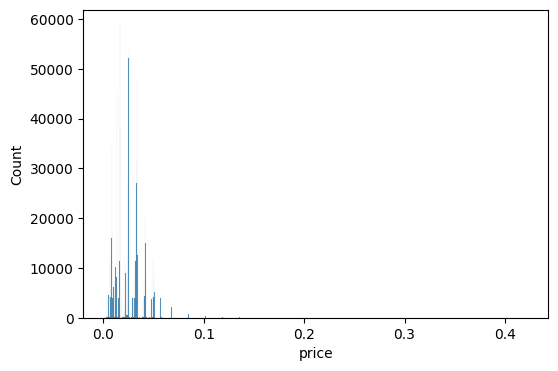

--------------------------------------------------------------------------------
Feature: week_num
count    794914.000000
mean         99.495382
std           1.733048
min          97.000000
25%          98.000000
50%         100.000000
75%         101.000000
max         102.000000
Name: week_num, dtype: float64


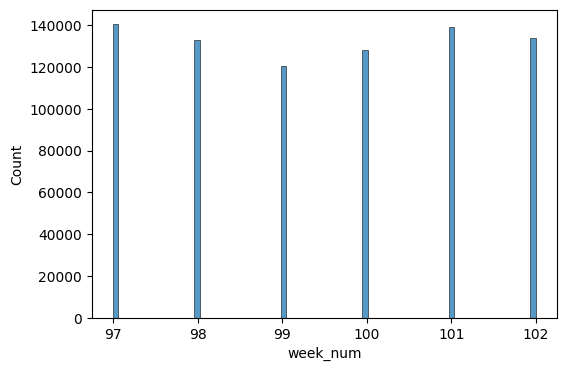

--------------------------------------------------------------------------------
Feature: bestseller_rank
count    794914.000000
mean        138.149333
std         333.926146
min           1.000000
25%           6.000000
50%          10.000000
75%          13.000000
max         999.000000
Name: bestseller_rank, dtype: float64


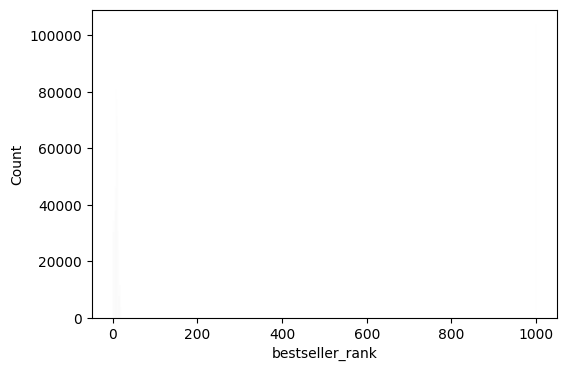

--------------------------------------------------------------------------------
Feature: weekly_sales_count
count    794914.000000
mean         21.256050
std           9.490062
min           0.000000
25%          18.000000
50%          22.000000
75%          25.000000
max          54.000000
Name: weekly_sales_count, dtype: float64


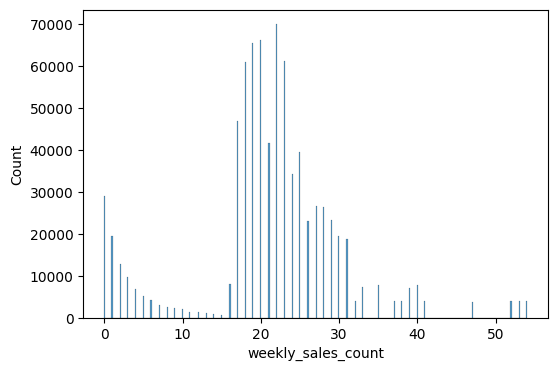

--------------------------------------------------------------------------------
Feature: weekly_avg_price
count    794914.000000
mean          0.024894
std           0.012731
min           0.000797
25%           0.016007
50%           0.024871
75%           0.033143
max           0.422034
Name: weekly_avg_price, dtype: float64


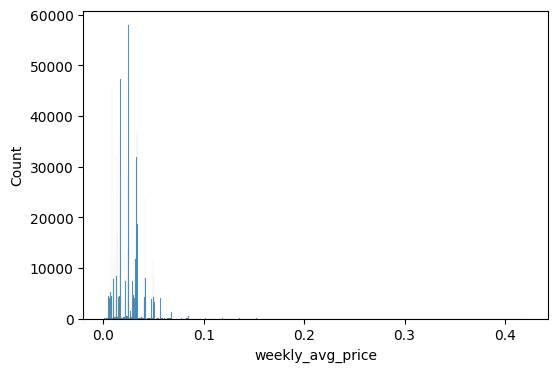

--------------------------------------------------------------------------------
Feature: cumulative_mean_age
count    794914.000000
mean         34.143106
std           4.377192
min          12.000000
25%          31.531532
50%          33.042373
75%          36.259259
max          83.000000
Name: cumulative_mean_age, dtype: float64


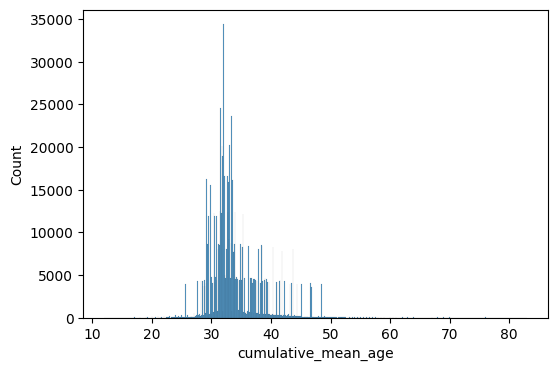

--------------------------------------------------------------------------------
Feature: cumulative_sales_count
count    794914.000000
mean        204.584587
std         248.402260
min           0.000000
25%          39.000000
50%         102.000000
75%         271.000000
max        1474.000000
Name: cumulative_sales_count, dtype: float64


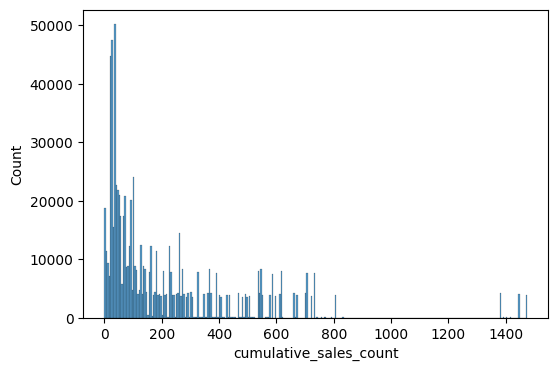

--------------------------------------------------------------------------------
Feature: fn
count    794914.000000
mean          0.460138
std           0.498409
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: fn, dtype: float64


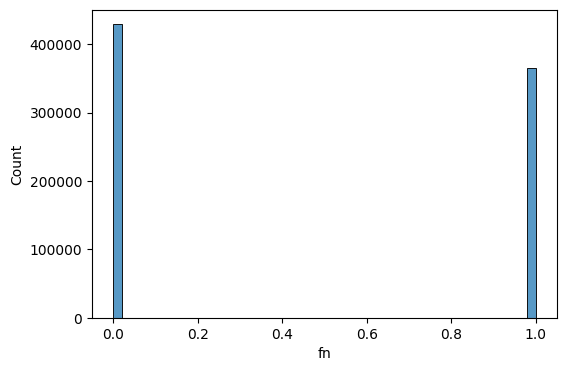

--------------------------------------------------------------------------------
Feature: active
count    794914.000000
mean          0.454663
std           0.497941
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: active, dtype: float64


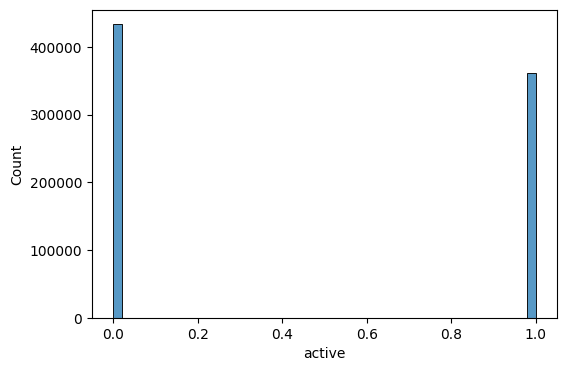

--------------------------------------------------------------------------------
Feature: age
count    794914.000000
mean         35.285022
std          13.733513
min          16.000000
25%          24.000000
50%          30.000000
75%          47.000000
max          84.000000
Name: age, dtype: float64


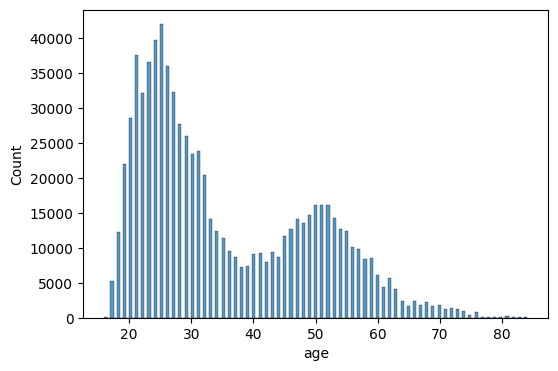

--------------------------------------------------------------------------------
Feature: customer_avg_price
count    794914.000000
mean          0.025899
std           0.011236
min           0.000898
25%           0.018966
50%           0.025153
75%           0.029881
max           0.252542
Name: customer_avg_price, dtype: float64


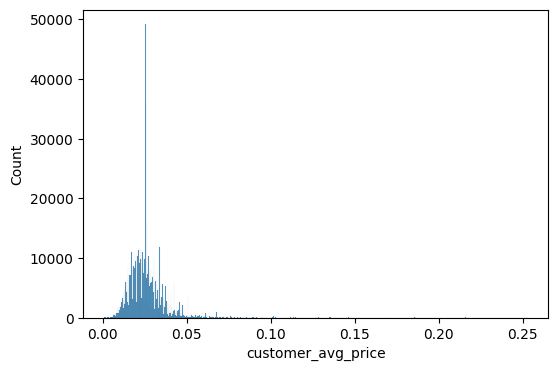

--------------------------------------------------------------------------------
Feature: text_embedding_similarity
count    794914.000000
mean          0.854334
std           0.282414
min           0.000000
25%           0.927541
50%           0.948114
75%           0.961651
max           1.000000
Name: text_embedding_similarity, dtype: float64


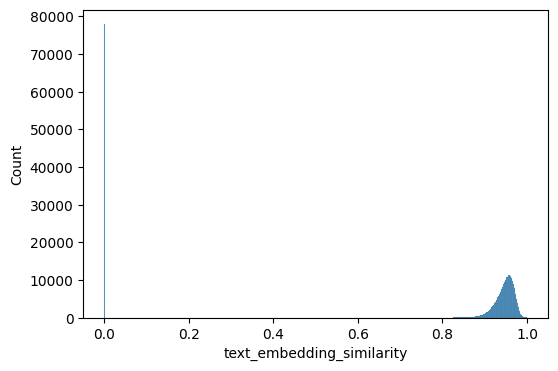

--------------------------------------------------------------------------------
Feature: image_embedding_similarity
count    794914.000000
mean          0.647191
std           0.233647
min           0.000000
25%           0.633032
50%           0.712043
75%           0.778290
max           1.000000
Name: image_embedding_similarity, dtype: float64


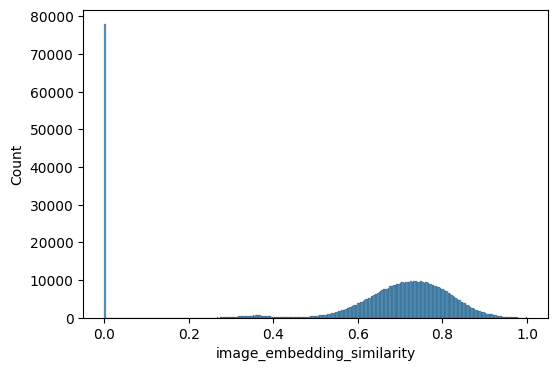

--------------------------------------------------------------------------------
Feature: age_difference
count    794914.000000
mean          1.141916
std          14.253881
min         -52.000000
25%          -9.712871
50%          -2.916667
75%          12.536585
max          57.351351
Name: age_difference, dtype: float64


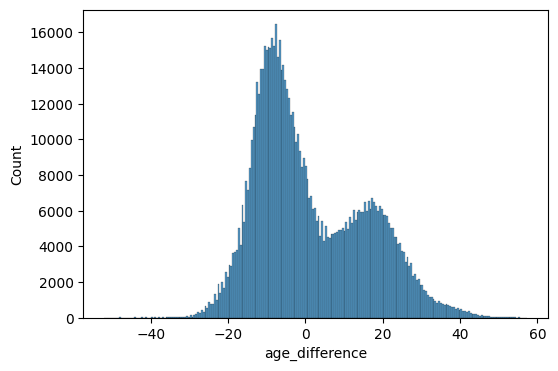

--------------------------------------------------------------------------------
Feature: age_ratio
count    794914.000000
mean         -0.109999
std           0.413599
min          -2.888889
25%          -0.404138
50%          -0.097687
75%           0.266484
max           0.743243
Name: age_ratio, dtype: float64


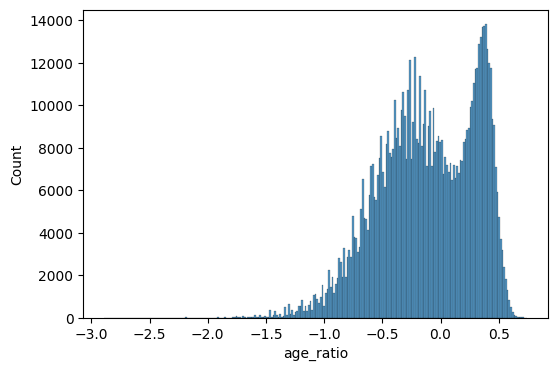

--------------------------------------------------------------------------------
Feature: price_difference
count    794914.000000
mean         -0.000973
std           0.016459
min          -0.246139
25%          -0.010771
50%          -0.000937
75%           0.008931
max           0.399420
Name: price_difference, dtype: float64


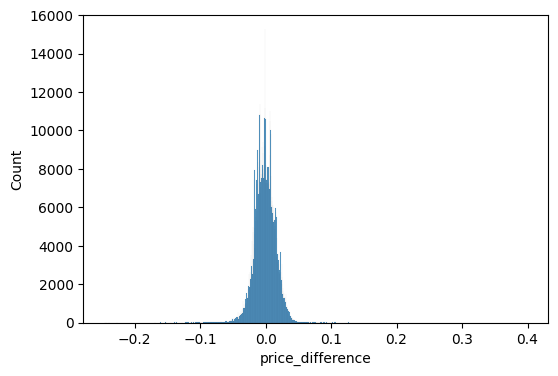

--------------------------------------------------------------------------------
Feature: price_ratio
count    794914.000000
mean          0.110295
std           0.802729
min          -0.985295
25%          -0.411336
50%          -0.038486
75%           0.423728
max          62.380638
Name: price_ratio, dtype: float64


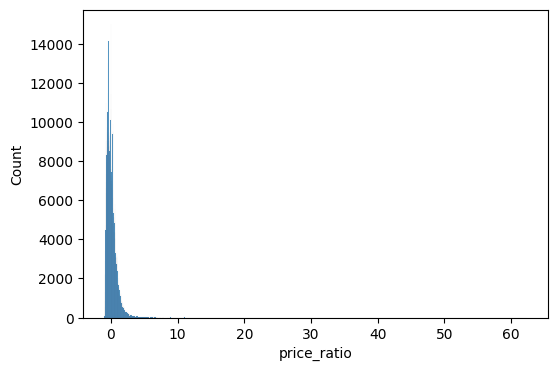

--------------------------------------------------------------------------------
Feature: month
count    794914.000000
mean          7.991441
std           0.587231
min           7.000000
25%           8.000000
50%           8.000000
75%           8.000000
max           9.000000
Name: month, dtype: float64


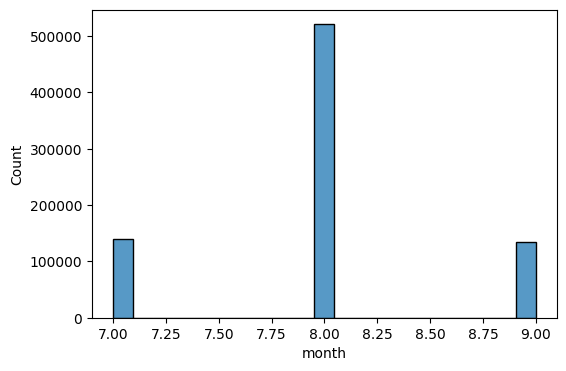

--------------------------------------------------------------------------------
Feature: product_type_no
count    794914.000000
mean         29.181138
std          20.235417
min           0.000000
25%          14.000000
50%          29.000000
75%          31.000000
max         124.000000
Name: product_type_no, dtype: float64


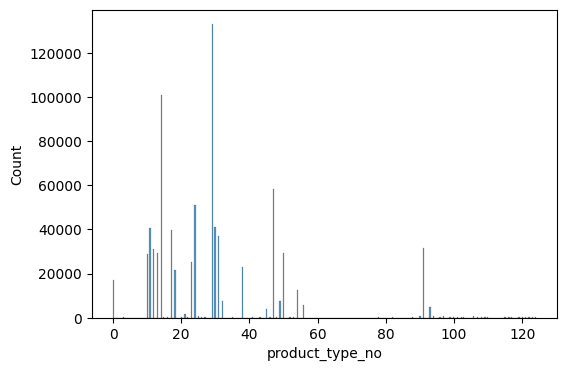

--------------------------------------------------------------------------------
Feature: graphical_appearance_no
count    794914.000000
mean         14.780369
std           5.427301
min           1.000000
25%          16.000000
50%          16.000000
75%          16.000000
max          29.000000
Name: graphical_appearance_no, dtype: float64


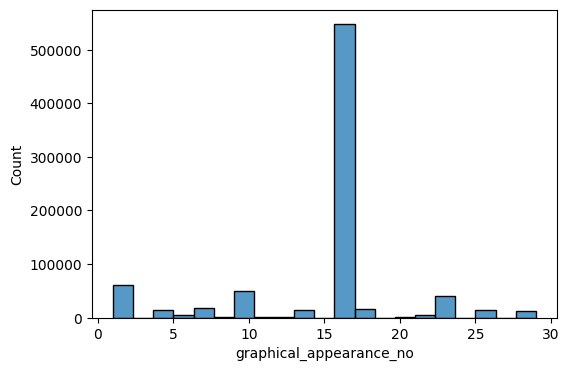

--------------------------------------------------------------------------------
Feature: colour_group_code
count    794914.000000
mean         31.105815
std          17.633191
min           1.000000
25%           9.000000
50%          39.000000
75%          45.000000
max          49.000000
Name: colour_group_code, dtype: float64


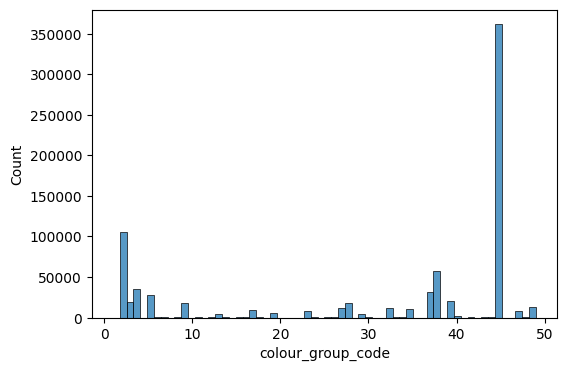

--------------------------------------------------------------------------------
Feature: perceived_colour_value_id
count    794914.000000
mean          3.209052
std           1.217900
min           1.000000
25%           2.000000
50%           4.000000
75%           4.000000
max           7.000000
Name: perceived_colour_value_id, dtype: float64


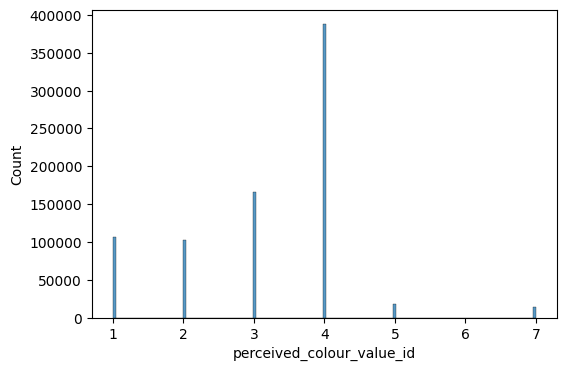

--------------------------------------------------------------------------------
Feature: perceived_colour_master_id
count    794914.000000
mean         13.562262
std           4.351046
min           0.000000
25%          11.000000
50%          15.000000
75%          15.000000
max          19.000000
Name: perceived_colour_master_id, dtype: float64


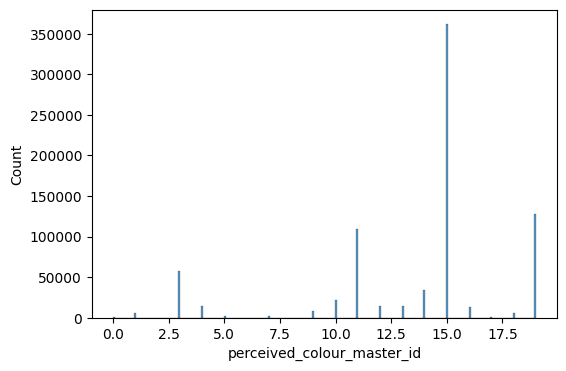

--------------------------------------------------------------------------------
Feature: department_no
count    794914.000000
mean         73.155340
std          68.537933
min           0.000000
25%          31.000000
50%          47.000000
75%         104.000000
max         294.000000
Name: department_no, dtype: float64


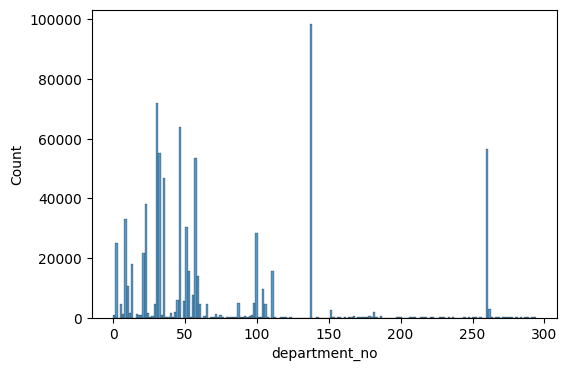

--------------------------------------------------------------------------------
Feature: index_code
count    794914.000000
mean          1.601995
std           2.439448
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           9.000000
Name: index_code, dtype: float64


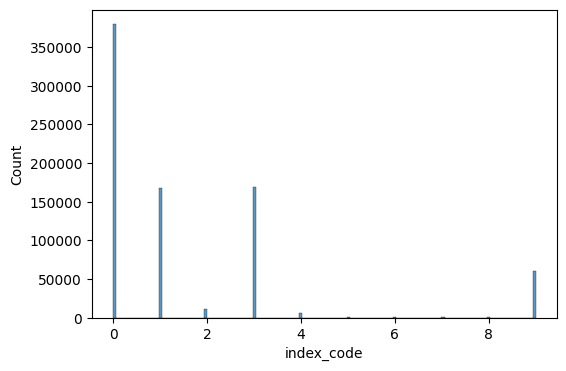

--------------------------------------------------------------------------------
Feature: index_group_no
count    794914.000000
mean          0.398233
std           0.687298
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: index_group_no, dtype: float64


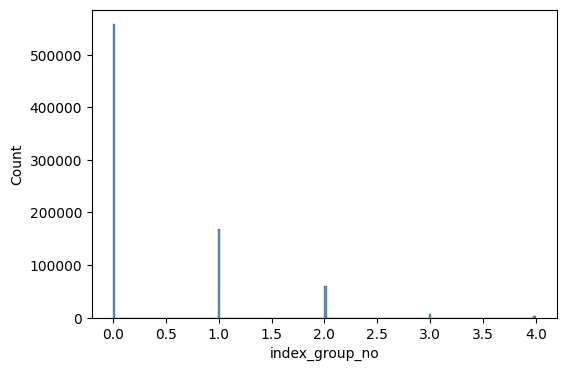

--------------------------------------------------------------------------------
Feature: section_no
count    794914.000000
mean         21.569707
std          18.411937
min           0.000000
25%           2.000000
50%          31.000000
75%          41.000000
max          56.000000
Name: section_no, dtype: float64


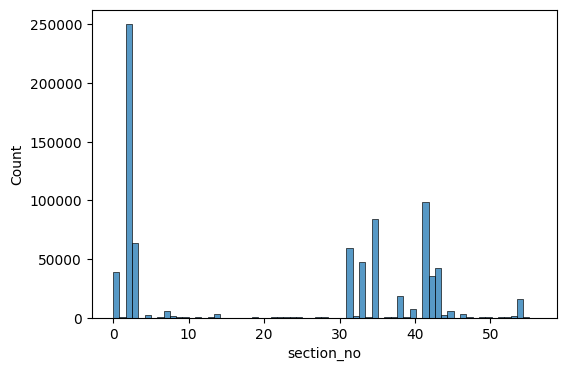

--------------------------------------------------------------------------------
Feature: garment_group_no
count    794914.000000
mean          7.657899
std           5.891007
min           0.000000
25%           2.000000
50%           7.000000
75%          14.000000
max          20.000000
Name: garment_group_no, dtype: float64


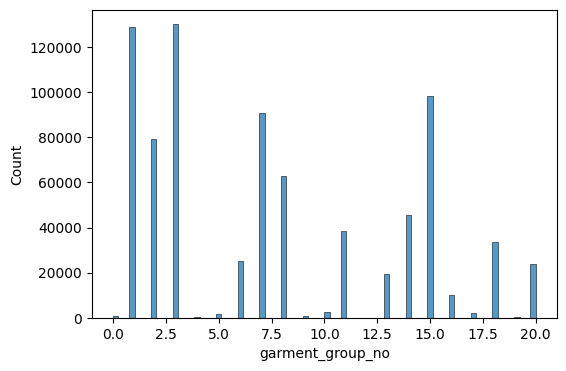

--------------------------------------------------------------------------------
Feature: club_member_status
count    794914.000000
mean          0.027841
std           0.242207
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: club_member_status, dtype: float64


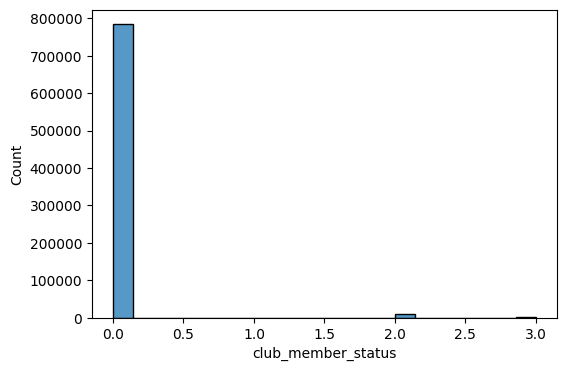

--------------------------------------------------------------------------------
Feature: fashion_news_frequency
count    794914.000000
mean          1.465985
std           0.504150
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: fashion_news_frequency, dtype: float64


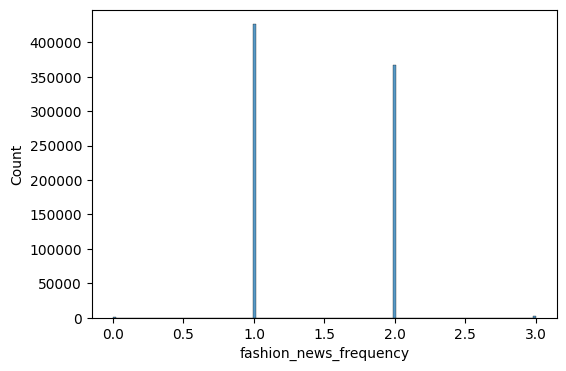

--------------------------------------------------------------------------------
Feature: postal_code
count    794914.000000
mean      27154.263986
std       15969.176545
min           0.000000
25%       12922.000000
50%       26847.000000
75%       41008.000000
max       55298.000000
Name: postal_code, dtype: float64


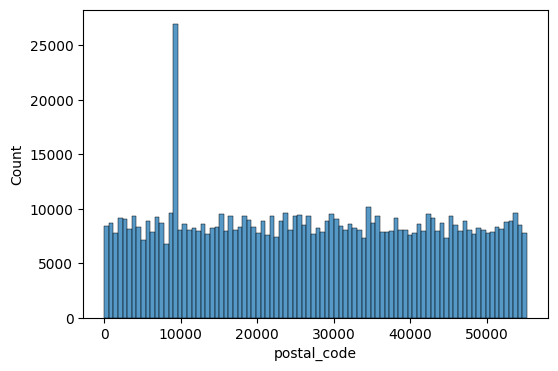

--------------------------------------------------------------------------------
Feature: age_bin
count    794914.000000
mean          2.461138
std           1.460185
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max           7.000000
Name: age_bin, dtype: float64


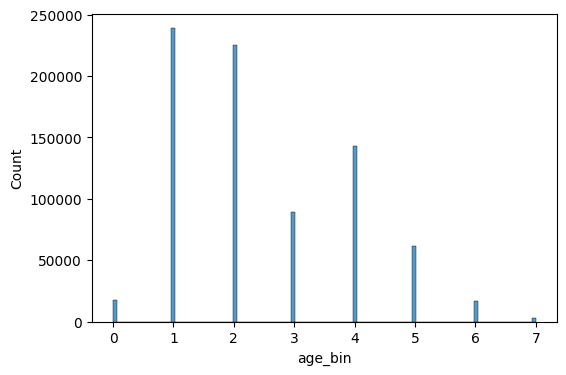

--------------------------------------------------------------------------------
Checks passed


In [22]:
test_lightgbm_data_features(results_train, verbose=True)

In [23]:
test_lightgbm_data_features(results_valid_train)

test_lightgbm_data_features(results_valid_inference)

test_lightgbm_data_features(results_test_inference)

Results use type: train, sample: train
Checking no missing values
Checking no duplicate columns
Checks passed
Results use type: inference, sample: valid
Checking no missing values
Checking no duplicate columns
Checks passed
Results use type: inference, sample: test
Checking no missing values
Checking no duplicate columns
Checks passed


### Embedding similarity


In [24]:
from src.utils.data_checks import test_input_embedding_similarity, test_input_customer_avg_price

In [25]:
customer_ids = results_train.data.customer_id.unique()[:3]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_embedding_similarity(results_train, customer_dynamic_features, article_embeddings, customer_id)
    print("=" * 100)
    print("")

Testing customer 1296218836199721
Unique week numbers for customer 1296218836199721 [101]
Week number: 101
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
0,101,1296218836199721,464297007,0.0,0.0
1,101,1296218836199721,572998009,0.0,0.0
2,101,1296218836199721,639448001,0.0,0.0


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
5,1296218836199721,100,0.025742,None,None


Article ID: 464297007
Checks for article 464297007 passed
Article ID: 572998009
Checks for article 572998009 passed
Article ID: 639448001
Checks for article 639448001 passed

Testing customer 1773900972412728
Unique week numbers for customer 1773900972412728 [97 98 99]
Week number: 97
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
34,97,1773900972412728,160442007,0.893573,0.552271
35,97,1773900972412728,160442010,0.892038,0.514953
36,97,1773900972412728,372860001,0.895935,0.589951


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
11,1773900972412728,96,0.018288,"[0.06357668, -0.4359992, 0.09506854, 0.0889691...","[1.4453709, 0.61529005, 0.20644498, 0.6087494,..."


Article ID: 160442007
Checks for article 160442007 passed
Article ID: 160442010
Checks for article 160442010 passed
Article ID: 372860001
Checks for article 372860001 passed
Week number: 98
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
65,98,1773900972412728,278811006,0.943522,0.817207
66,98,1773900972412728,372860001,0.919684,0.687429
67,98,1773900972412728,372860002,0.916694,0.641248


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
12,1773900972412728,97,0.022356,"[0.13172701, -0.40080398, 0.120257035, 0.07943...","[1.0801554, 0.36320084, 0.89422876, 0.85783654..."


Article ID: 278811006
Checks for article 278811006 passed
Article ID: 372860001
Checks for article 372860001 passed
Article ID: 372860002
Checks for article 372860002 passed
Week number: 99
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
103,99,1773900972412728,351484039,0.979374,0.751635
104,99,1773900972412728,448509014,0.915067,0.597001
105,99,1773900972412728,559616013,0.982334,0.816239


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
13,1773900972412728,98,0.025746,"[0.06033192, -0.45515198, 0.20538001, 0.214913...","[1.1657206, 0.44650984, 1.107896, 1.1532925, 0..."


Article ID: 351484039
Checks for article 351484039 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 559616013
Checks for article 559616013 passed

Testing customer 1827730561464445
Unique week numbers for customer 1827730561464445 [ 97  98 102]
Week number: 97
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
139,97,1827730561464445,160442007,0.931919,0.609381
140,97,1827730561464445,160442010,0.930855,0.630615
141,97,1827730561464445,372860001,0.902105,0.667094


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
21,1827730561464445,96,0.016932,"[0.06457747, -0.45118746, 0.20372093, 0.196264...","[0.8585335, 0.37660927, 1.0784122, 0.9641577, ..."


Article ID: 160442007
Checks for article 160442007 passed
Article ID: 160442010
Checks for article 160442010 passed
Article ID: 372860001
Checks for article 372860001 passed
Week number: 98
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
176,98,1827730561464445,278811006,0.950278,0.690102
177,98,1827730561464445,372860001,0.906829,0.679864
178,98,1827730561464445,372860002,0.904471,0.679916


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
22,1827730561464445,97,0.024729,"[0.05634601, -0.41328248, 0.20124832, 0.191739...","[0.7507862, 0.10766339, 0.7318176, 1.3567438, ..."


Article ID: 278811006
Checks for article 278811006 passed
Article ID: 372860001
Checks for article 372860001 passed
Article ID: 372860002
Checks for article 372860002 passed
Week number: 102
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
213,102,1827730561464445,158340001,0.950501,0.789212
214,102,1827730561464445,547780001,0.927031,0.690263
215,102,1827730561464445,547780003,0.917609,0.679029


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
26,1827730561464445,101,0.033881,"[0.02071783, -0.40782085, 0.20301573, 0.168419...","[1.1360425, 0.10442577, 0.52077454, 1.0068432,..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 547780001
Checks for article 547780001 passed
Article ID: 547780003
Checks for article 547780003 passed



In [26]:
customer_ids = results_train.data.customer_id.unique()[:5]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_customer_avg_price(results_train, customer_dynamic_features, customer_id)
    print("=" * 100)
    print("")

Testing customer 1296218836199721
Customer 1296218836199721 has 1 weeks: [101]
Week number: 101
Checks for customer 1296218836199721 and week 101 passed

Testing customer 1773900972412728
Customer 1773900972412728 has 3 weeks: [97 98 99]
Week number: 97
Checks for customer 1773900972412728 and week 97 passed
Week number: 98
Checks for customer 1773900972412728 and week 98 passed
Week number: 99
Checks for customer 1773900972412728 and week 99 passed

Testing customer 1827730561464445
Customer 1827730561464445 has 3 weeks: [ 97  98 102]
Week number: 97
Checks for customer 1827730561464445 and week 97 passed
Week number: 98
Checks for customer 1827730561464445 and week 98 passed
Week number: 102
Checks for customer 1827730561464445 and week 102 passed

Testing customer 3828854365940846
Customer 3828854365940846 has 1 weeks: [100]
Week number: 100
Checks for customer 3828854365940846 and week 100 passed

Testing customer 4380278954532948
Customer 4380278954532948 has 1 weeks: [97]
Week nu

In [27]:
customer_ids = results_valid_inference.data.customer_id.unique()[:3]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_embedding_similarity(results_valid_inference, customer_dynamic_features, article_embeddings, customer_id)
    print("=" * 100)
    print("")

Testing customer 8383252499052781
Unique week numbers for customer 8383252499052781 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
0,103,8383252499052781,158340001,0.937227,0.699225
1,103,8383252499052781,372860001,0.933187,0.650016
2,103,8383252499052781,673677002,0.971322,0.775709


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
117,8383252499052781,102,0.026085,"[0.10068627, -0.37541887, 0.14461511, 0.119991...","[0.6455998, 0.6625011, 0.3061981, 1.077207, 0...."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 372860001
Checks for article 372860001 passed
Article ID: 673677002
Checks for article 673677002 passed

Testing customer 8905125085410841
Unique week numbers for customer 8905125085410841 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
31,103,8905125085410841,158340001,0.954716,0.768900
32,103,8905125085410841,372860001,0.922111,0.694922
33,103,8905125085410841,673677002,0.949539,0.722667


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
127,8905125085410841,102,0.030702,"[0.035610568, -0.45221344, 0.105324365, 0.0582...","[0.9816493, 0.1222574, 0.45535034, 0.8849651, ..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 372860001
Checks for article 372860001 passed
Article ID: 673677002
Checks for article 673677002 passed

Testing customer 9521347140039091
Unique week numbers for customer 9521347140039091 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
61,103,9521347140039091,158340001,0.932199,0.724336
62,103,9521347140039091,220094020,0.964279,0.808137
63,103,9521347140039091,372860001,0.927921,0.670600


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
137,9521347140039091,102,0.020322,"[0.060018428, -0.33213335, 0.1721594, 0.155975...","[1.13182, 0.27458978, 0.657987, 0.24480057, 0...."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 220094020
Checks for article 220094020 passed
Article ID: 372860001
Checks for article 372860001 passed



In [28]:
customer_ids = results_valid_train.data.customer_id.unique()[:5]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_customer_avg_price(results_valid_train, customer_dynamic_features, customer_id)
    print("=" * 100)
    print("")

Testing customer 8383252499052781
Customer 8383252499052781 has 1 weeks: [103]
Week number: 103
Checks for customer 8383252499052781 and week 103 passed

Testing customer 8905125085410841
Customer 8905125085410841 has 1 weeks: [103]
Week number: 103
Checks for customer 8905125085410841 and week 103 passed

Testing customer 9521347140039091
Customer 9521347140039091 has 1 weeks: [103]
Week number: 103
Checks for customer 9521347140039091 and week 103 passed

Testing customer 10698768556209946
Customer 10698768556209946 has 1 weeks: [103]
Week number: 103
Checks for customer 10698768556209946 and week 103 passed

Testing customer 12281621100368004
Customer 12281621100368004 has 1 weeks: [103]
Week number: 103
Checks for customer 12281621100368004 and week 103 passed



In [29]:
customer_ids = results_valid_inference.data.customer_id.unique()[:3]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_embedding_similarity(results_valid_inference, customer_dynamic_features, article_embeddings, customer_id)
    print("=" * 100)
    print("")

Testing customer 8383252499052781
Unique week numbers for customer 8383252499052781 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
0,103,8383252499052781,158340001,0.937227,0.699225
1,103,8383252499052781,372860001,0.933187,0.650016
2,103,8383252499052781,673677002,0.971322,0.775709


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
117,8383252499052781,102,0.026085,"[0.10068627, -0.37541887, 0.14461511, 0.119991...","[0.6455998, 0.6625011, 0.3061981, 1.077207, 0...."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 372860001
Checks for article 372860001 passed
Article ID: 673677002
Checks for article 673677002 passed

Testing customer 8905125085410841
Unique week numbers for customer 8905125085410841 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
31,103,8905125085410841,158340001,0.954716,0.768900
32,103,8905125085410841,372860001,0.922111,0.694922
33,103,8905125085410841,673677002,0.949539,0.722667


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
127,8905125085410841,102,0.030702,"[0.035610568, -0.45221344, 0.105324365, 0.0582...","[0.9816493, 0.1222574, 0.45535034, 0.8849651, ..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 372860001
Checks for article 372860001 passed
Article ID: 673677002
Checks for article 673677002 passed

Testing customer 9521347140039091
Unique week numbers for customer 9521347140039091 [103]
Week number: 103
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
61,103,9521347140039091,158340001,0.932199,0.724336
62,103,9521347140039091,220094020,0.964279,0.808137
63,103,9521347140039091,372860001,0.927921,0.670600


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
137,9521347140039091,102,0.020322,"[0.060018428, -0.33213335, 0.1721594, 0.155975...","[1.13182, 0.27458978, 0.657987, 0.24480057, 0...."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 220094020
Checks for article 220094020 passed
Article ID: 372860001
Checks for article 372860001 passed



In [30]:
customer_ids = results_valid_inference.data.customer_id.unique()[:5]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_customer_avg_price(results_valid_inference, customer_dynamic_features, customer_id)
    print("=" * 100)
    print("")

Testing customer 8383252499052781
Customer 8383252499052781 has 1 weeks: [103]
Week number: 103
Checks for customer 8383252499052781 and week 103 passed

Testing customer 8905125085410841
Customer 8905125085410841 has 1 weeks: [103]
Week number: 103
Checks for customer 8905125085410841 and week 103 passed

Testing customer 9521347140039091
Customer 9521347140039091 has 1 weeks: [103]
Week number: 103
Checks for customer 9521347140039091 and week 103 passed

Testing customer 10698768556209946
Customer 10698768556209946 has 1 weeks: [103]
Week number: 103
Checks for customer 10698768556209946 and week 103 passed

Testing customer 12281621100368004
Customer 12281621100368004 has 1 weeks: [103]
Week number: 103
Checks for customer 12281621100368004 and week 103 passed



In [31]:
customer_ids = results_test_inference.data.customer_id.unique()[:3]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_embedding_similarity(results_test_inference, customer_dynamic_features, article_embeddings, customer_id)
    print("=" * 100)
    print("")

Testing customer 1827730561464445
Unique week numbers for customer 1827730561464445 [104]
Week number: 104
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
0,104,1827730561464445,158340001,0.919324,0.655054
1,104,1827730561464445,448509014,0.974497,0.804475
2,104,1827730561464445,547780001,0.990005,0.936955


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
28,1827730561464445,103,0.025407,"[0.11346084, -0.33399263, 0.08457478, 0.106714...","[1.0963573, 0.19552906, 0.15521294, 0.3109725,..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 547780001
Checks for article 547780001 passed

Testing customer 14530095987536234
Unique week numbers for customer 14530095987536234 [104]
Week number: 104
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
39,104,14530095987536234,158340001,0.0,0.0
40,104,14530095987536234,448509014,0.0,0.0
41,104,14530095987536234,673677002,0.0,0.0


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
218,14530095987536234,103,0.027354,None,None


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 673677002
Checks for article 673677002 passed

Testing customer 19322124157691378
Unique week numbers for customer 19322124157691378 [104]
Week number: 104
Top 3 rows:


,week_num,customer_id,article_id,text_embedding_similarity,image_embedding_similarity
69,104,19322124157691378,158340001,0.942380,0.664326
70,104,19322124157691378,448509014,0.943267,0.757212
71,104,19322124157691378,452898025,0.972813,0.872011


,customer_id,week_num,customer_avg_price,customer_avg_text_embedding,customer_avg_image_embedding
248,19322124157691378,103,0.022356,"[0.13496374, -0.33964577, 0.07485411, 0.044976...","[0.8649209, 0.57712907, 0.040189587, 1.6106079..."


Article ID: 158340001
Checks for article 158340001 passed
Article ID: 448509014
Checks for article 448509014 passed
Article ID: 452898025
Checks for article 452898025 passed



In [32]:
customer_ids = results_test_inference.data.customer_id.unique()[:5]
for customer_id in customer_ids:
    print(f"Testing customer {customer_id}")
    test_input_customer_avg_price(results_test_inference, customer_dynamic_features, customer_id)
    print("=" * 100)
    print("")

Testing customer 1827730561464445
Customer 1827730561464445 has 1 weeks: [104]
Week number: 104
Checks for customer 1827730561464445 and week 104 passed

Testing customer 14530095987536234
Customer 14530095987536234 has 1 weeks: [104]
Week number: 104
Checks for customer 14530095987536234 and week 104 passed

Testing customer 19322124157691378
Customer 19322124157691378 has 1 weeks: [104]
Week number: 104
Checks for customer 19322124157691378 and week 104 passed

Testing customer 25205728466478669
Customer 25205728466478669 has 1 weeks: [104]
Week number: 104
Checks for customer 25205728466478669 and week 104 passed

Testing customer 40947592920601659
Customer 40947592920601659 has 1 weeks: [104]
Week number: 104
Checks for customer 40947592920601659 and week 104 passed



## Articles dynamic features

- check that we join with the correct weeks


In [33]:
from src.utils.data_checks import test_input_articles_dynamic_features
from src.features_articles import ArticleDynamicFeatureResult, get_path_to_article_features

In [34]:
path_to_article_features_train = get_path_to_article_features(feature_type="dynamic", subsample=0.05, seed=42)
article_dynamic_features = ArticleDynamicFeatureResult.load(path_to_article_features_train)

2025-06-03 17:17:12,944 - src.features_articles - INFO - Loading article dynamic feature result from ../data/preprocessed/articles_dynamic/subsample_0.05_42
2025-06-03 17:17:12,982 - src.features_articles - INFO - Loaded data from ../data/preprocessed/articles_dynamic/subsample_0.05_42/data.parquet
2025-06-03 17:17:12,985 - src.features_articles - INFO - Loaded feature names from ../data/preprocessed/articles_dynamic/subsample_0.05_42/feature_names.json


In [35]:
test_input_articles_dynamic_features(article_dynamic_features, results_train)

Week number: 97


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
34,1773900972412728,97,160442007,17.0,0.013542,369.0,35.216802
35,1773900972412728,97,160442010,30.0,0.013342,304.0,39.026316
36,1773900972412728,97,372860001,19.0,0.013297,709.0,33.320169


Article ID: 160442007


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
3383,160442007,96,17.0,0.013542,35.216802,369.0


Checks for article 160442007 and week 97 passed
--------------------------------------------------------------------------------
Article ID: 160442010


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
3436,160442010,96,30.0,0.013342,39.026316,304.0


Checks for article 160442010 and week 97 passed
--------------------------------------------------------------------------------
Article ID: 372860001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
64810,372860001,96,19.0,0.013297,33.320169,709.0


Checks for article 372860001 and week 97 passed
--------------------------------------------------------------------------------
Week number: 98


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
65,1773900972412728,98,278811006,20.0,0.032881,163.0,35.110429
66,1773900972412728,98,372860001,25.0,0.013371,734.0,33.202997
67,1773900972412728,98,372860002,18.0,0.013521,554.0,33.321300


Article ID: 278811006


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
26492,278811006,97,20.0,0.032881,35.110429,163.0


Checks for article 278811006 and week 98 passed
--------------------------------------------------------------------------------
Article ID: 372860001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
64811,372860001,97,25.0,0.013371,33.202997,734.0


Checks for article 372860001 and week 98 passed
--------------------------------------------------------------------------------
Article ID: 372860002


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
64864,372860002,97,18.0,0.013521,33.3213,554.0


Checks for article 372860002 and week 98 passed
--------------------------------------------------------------------------------
Week number: 99


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
103,1773900972412728,99,351484039,31.0,0.021340,171.0,31.818713
104,1773900972412728,99,448509014,19.0,0.041822,484.0,30.221074
105,1773900972412728,99,559616013,39.0,0.025050,180.0,33.088889


Article ID: 351484039


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
56544,351484039,98,31.0,0.02134,31.818713,171.0


Checks for article 351484039 and week 99 passed
--------------------------------------------------------------------------------
Article ID: 448509014


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
116593,448509014,98,19.0,0.041822,30.221074,484.0


Checks for article 448509014 and week 99 passed
--------------------------------------------------------------------------------
Article ID: 559616013


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
445670,559616013,98,39.0,0.02505,33.088889,180.0


Checks for article 559616013 and week 99 passed
--------------------------------------------------------------------------------
Week number: 100


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
253,3828854365940846,100,372860002,17.0,0.012682,587.0,33.287905
254,3828854365940846,100,448509014,23.0,0.040581,507.0,30.416174
255,3828854365940846,100,599580044,16.0,0.013289,57.0,34.280702


Article ID: 372860002


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
64866,372860002,99,17.0,0.012682,33.287905,587.0


Checks for article 372860002 and week 100 passed
--------------------------------------------------------------------------------
Article ID: 448509014


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
116594,448509014,99,23.0,0.040581,30.416174,507.0


Checks for article 448509014 and week 100 passed
--------------------------------------------------------------------------------
Article ID: 599580044


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
738019,599580044,99,16.0,0.013289,34.280702,57.0


Checks for article 599580044 and week 100 passed
--------------------------------------------------------------------------------
Week number: 101


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
0,1296218836199721,101,464297007,20.0,0.016370,619.0,31.546042
1,1296218836199721,101,572998009,20.0,0.041466,37.0,28.513514
2,1296218836199721,101,639448001,19.0,0.050206,82.0,32.170732


Article ID: 464297007


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
139597,464297007,100,20.0,0.01637,31.546042,619.0


Checks for article 464297007 and week 101 passed
--------------------------------------------------------------------------------
Article ID: 572998009


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
561795,572998009,100,20.0,0.041466,28.513514,37.0


Checks for article 572998009 and week 101 passed
--------------------------------------------------------------------------------
Article ID: 639448001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
1141085,639448001,100,19.0,0.050206,32.170732,82.0


Checks for article 639448001 and week 101 passed
--------------------------------------------------------------------------------
Week number: 102


,customer_id,week_num,article_id,weekly_sales_count,weekly_avg_price,cumulative_sales_count,cumulative_mean_age
213,1827730561464445,102,158340001,23.0,0.012494,536.0,31.994403
214,1827730561464445,102,547780001,10.0,0.024583,207.0,34.990338
215,1827730561464445,102,547780003,17.0,0.024912,174.0,34.511494


Article ID: 158340001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
3335,158340001,101,23.0,0.012494,31.994403,536.0


Checks for article 158340001 and week 102 passed
--------------------------------------------------------------------------------
Article ID: 547780001


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
370148,547780001,101,10.0,0.024583,34.990338,207.0


Checks for article 547780001 and week 102 passed
--------------------------------------------------------------------------------
Article ID: 547780003


,article_id,week_num,weekly_sales_count,weekly_avg_price,cumulative_mean_age,cumulative_sales_count
370254,547780003,101,17.0,0.024912,34.511494,174.0


Checks for article 547780003 and week 102 passed
--------------------------------------------------------------------------------
